## Google Play Store apps and reviews

In [13]:
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

apps = apps_with_duplicates.drop_duplicates()

print('Total number of apps in the dataset = ', apps["App"].count())

print(apps.head())

Total number of apps in the dataset =  9659
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1 

## Data cleaning

In [14]:
chars_to_remove = ["+", ",", "$"]
cols_to_clean = ["Installs", "Price"]

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))

print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 754.6+ KB
None


## Correcting data types

In [15]:
import numpy as np

apps["Installs"] = apps["Installs"].astype('float')

apps["Price"] = apps["Price"].astype('float')

print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 830.1+ KB
None


## Exploring app categories

Number of categories =  33


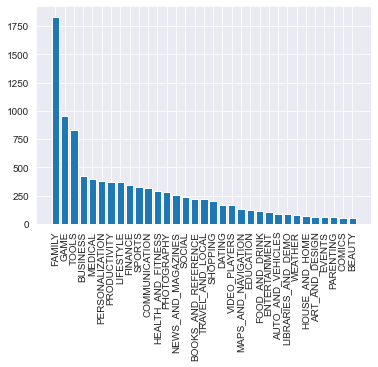

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

num_categories = np.count_nonzero(apps["Category"].unique())
print('Number of categories = ', num_categories)

num_apps_in_category = apps["Category"].value_counts()

sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

fig, ax = plt.subplots()

ax.bar(num_apps_in_category.index, num_apps_in_category.values)
ax.set_xticklabels(num_apps_in_category.index, rotation = 90)

plt.show()

## Distribution of app ratings

In [25]:
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

Average app rating =  4.173243045387994


## Size and price of an app

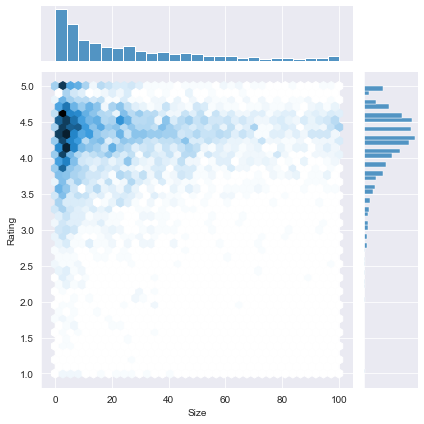

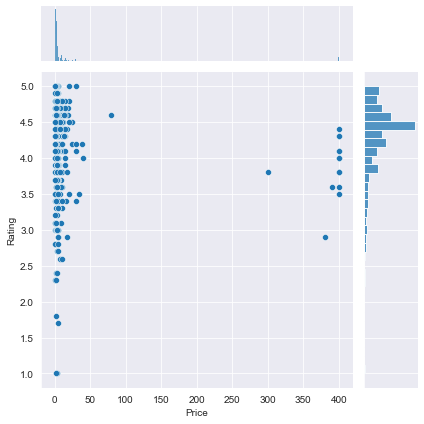

In [26]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

apps_with_size_and_rating_present = apps[apps['Rating'].notna() & apps['Size'].notna()]

large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250)

plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"], kind = "hex")

paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == "Paid"]

plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

## Relation between app category and app price

Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         💎 I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.99
8780  LIFESTYLE  I'm Rich/Eu sou Rico/أنا غني/我很有錢  399.99

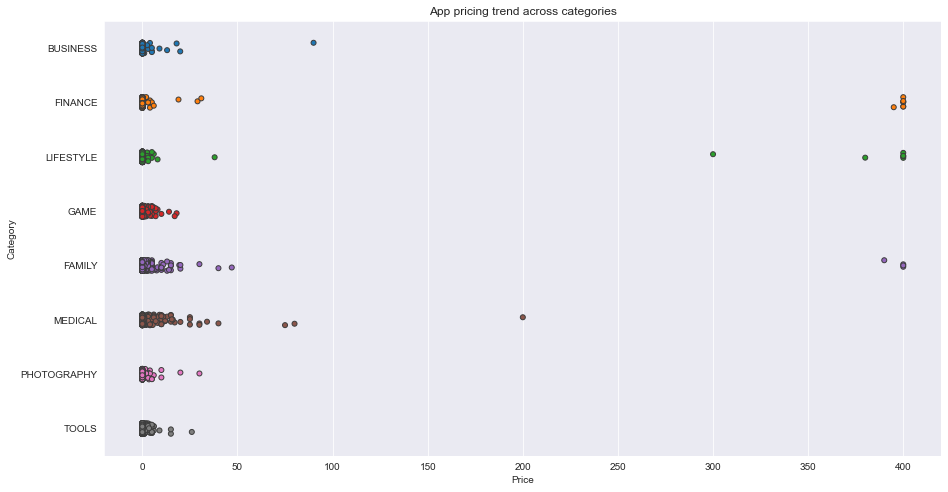

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

apps_above_200 = apps[apps["Price"] > 200]
apps_above_200[['Category', 'App', 'Price']]

## Filter out "junk" apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

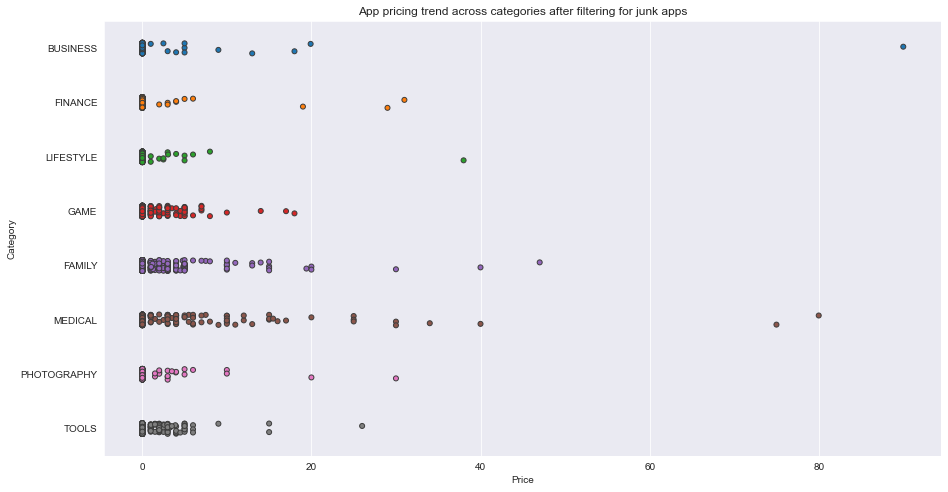

In [29]:
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x = apps_under_100["Price"], y = apps_under_100["Category"], jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## Sentiment analysis of user reviews

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

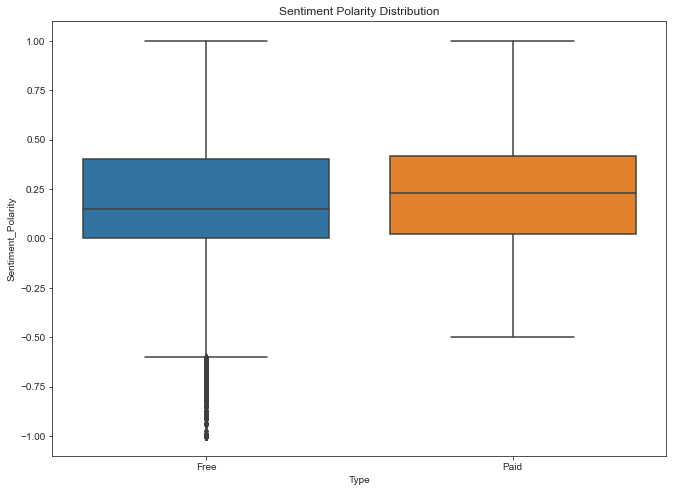

In [31]:
reviews_df = pd.read_csv("datasets/user_reviews.csv")

merged_df = apps.merge(reviews_df)

merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = merged_df)
ax.set_title('Sentiment Polarity Distribution')